In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
names=['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DPF','Age','Class']
db=pd.read_csv("pima-indians-diabetes.csv",names=names)

In [53]:
db.head()
#print (db.size)
#print (db.shape[0])

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
X=db.iloc[:, :-1].values
y=db.iloc[:, 8].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [46]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[90 13]
 [26 25]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82       103
          1       0.66      0.49      0.56        51

avg / total       0.74      0.75      0.74       154



In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test)) 

Text(0,0.5,'Mean Error')

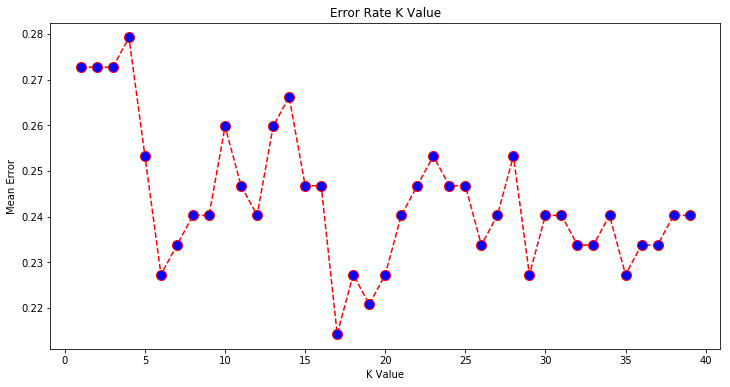

In [14]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [16]:
classifier2 = KNeighborsClassifier(n_neighbors=17)  
classifier2.fit(X_train, y_train)
pred = classifier2.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, pred))  
print(classification_report(y_test, pred))

[[96  7]
 [26 25]]
             precision    recall  f1-score   support

          0       0.79      0.93      0.85       103
          1       0.78      0.49      0.60        51

avg / total       0.79      0.79      0.77       154



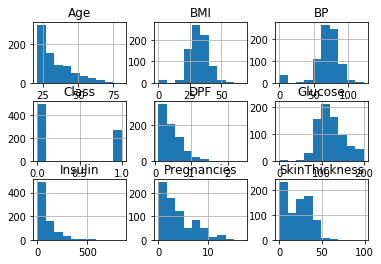

In [18]:
db.hist()
plt.show()

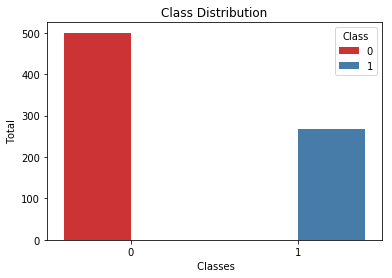

In [31]:

ax = sns.countplot(x='Class',hue='Class',palette = 'Set1',data=db)
ax.set(title = 'Class Distribution',xlabel = ' Classes',ylabel="Total")
plt.show()


In [39]:
print (y_test)


[1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 1]


In [50]:
#kuch nahi

In [47]:
#for different training test set
X1=db.iloc[:, :-1].values
y1=db.iloc[:, 8].values
X1_train, X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30)

In [48]:
scaler = StandardScaler()  
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)  
X1_test = scaler.transform(X1_test)

In [49]:
classifier3 = KNeighborsClassifier(n_neighbors=17)  
classifier3.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [51]:
y1_pred = classifier.predict(X1_test)

In [52]:
print(confusion_matrix(y1_test, y1_pred))  
print(classification_report(y1_test, y1_pred))

[[147  12]
 [ 28  44]]
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       159
          1       0.79      0.61      0.69        72

avg / total       0.82      0.83      0.82       231

